In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.isna())

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [4]:
print(df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
df.duplicated()[df.duplicated()==True]


Series([], dtype: bool)

In [7]:
print("Shape (rows, columns): ", df.shape,"\n")
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1460, 81) 

number of rows:  1460
number of columns:  81


In [19]:
df.dtypes


Id                 int64
MSSubClass         int64
MSZoning             str
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType             str
SaleCondition        str
SalePrice          int64
Length: 81, dtype: object

In [20]:
df["SalePrice"] = df["SalePrice"].replace(r"[\$,]", "", regex=True)
df["SalePrice"] = pd.to_numeric(df["SalePrice"])
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning             str
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType             str
SaleCondition        str
SalePrice          int64
Length: 81, dtype: object

In [17]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


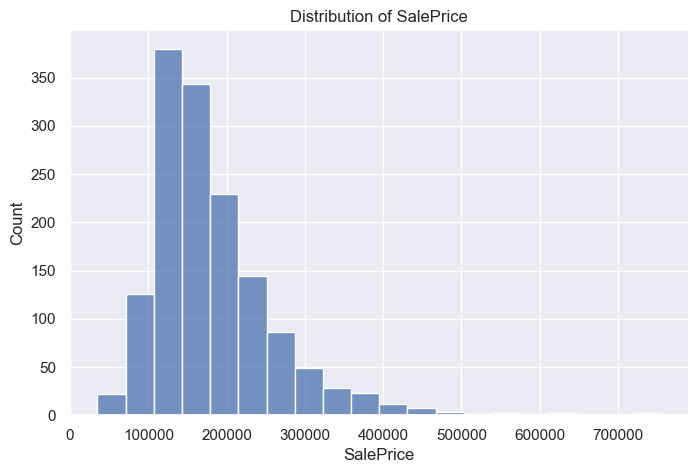

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=20)
plt.title("Distribution of SalePrice")
plt.show()

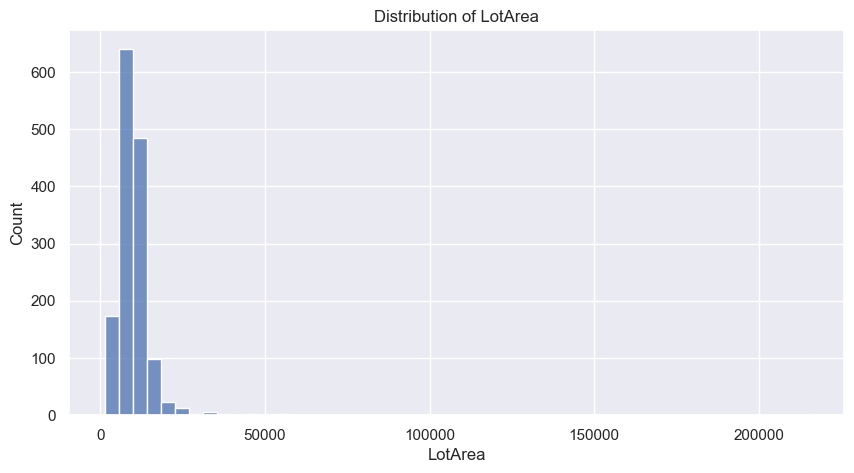

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df["LotArea"], bins=50)
plt.title("Distribution of LotArea")
plt.show()

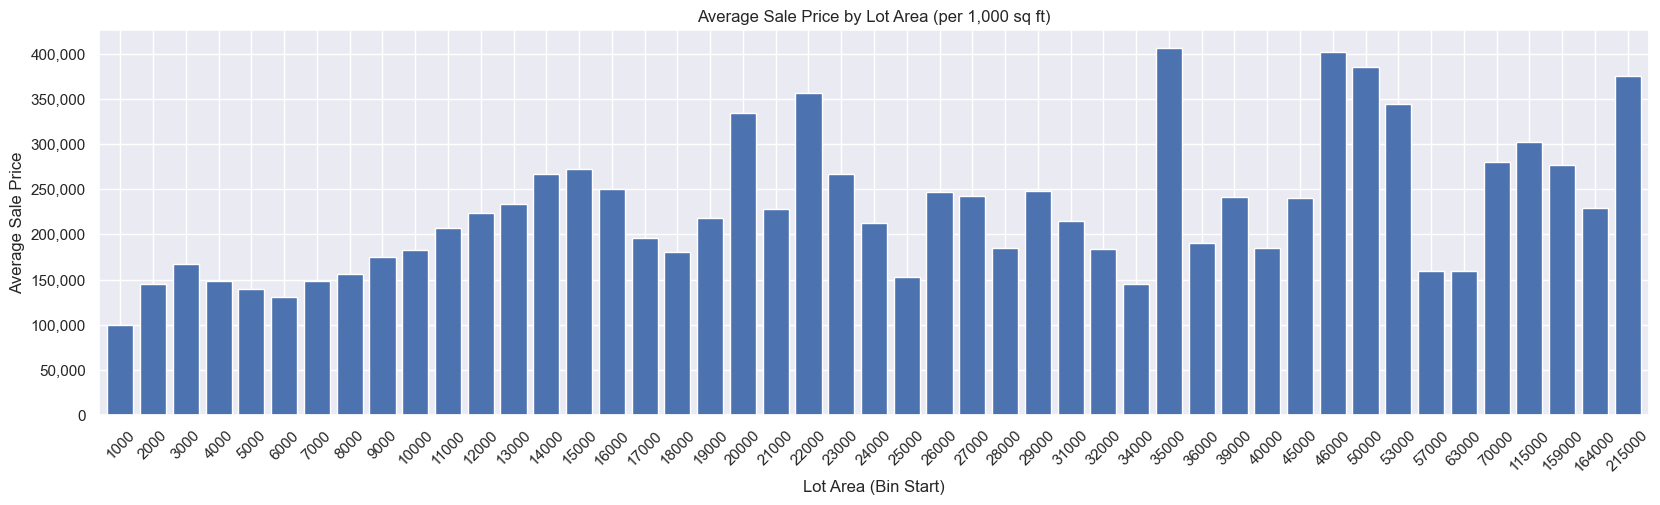

LotArea_Group
1000       99456.000000
2000      145676.666667
3000      167429.150000
4000      148893.872340
5000      139137.764706
6000      130292.000000
7000      148609.692810
8000      155813.051020
9000      175187.873239
10000     182979.565714
11000     207037.601562
12000     223571.666667
13000     233382.062500
14000     266642.446809
15000     272485.000000
16000     249927.130435
17000     196415.600000
18000     180916.666667
19000     218394.000000
20000     334413.500000
21000     228421.818182
22000     357000.000000
23000     267362.500000
24000     212700.000000
25000     153050.000000
26000     246450.000000
27000     242000.000000
28000     185000.000000
29000     248000.000000
31000     215000.000000
32000     184312.000000
34000     145000.000000
35000     405850.000000
36000     190000.000000
39000     241500.000000
40000     184750.000000
45000     240000.000000
46000     402000.000000
50000     385000.000000
53000     344666.666667
57000     160000.000000
63

In [51]:
df['LotArea_Group'] = (df['LotArea'] // 1000) * 1000
avg_price_by_lot = df.groupby('LotArea_Group')['SalePrice'].mean()
plt.figure(figsize=(20, 5))
ax = avg_price_by_lot.plot(kind='bar', width=0.8)
plt.title("Average Sale Price by Lot Area (per 1,000 sq ft)")
plt.ylabel("Average Sale Price")
plt.xlabel("Lot Area (Bin Start)")
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
avg_price_by_lot

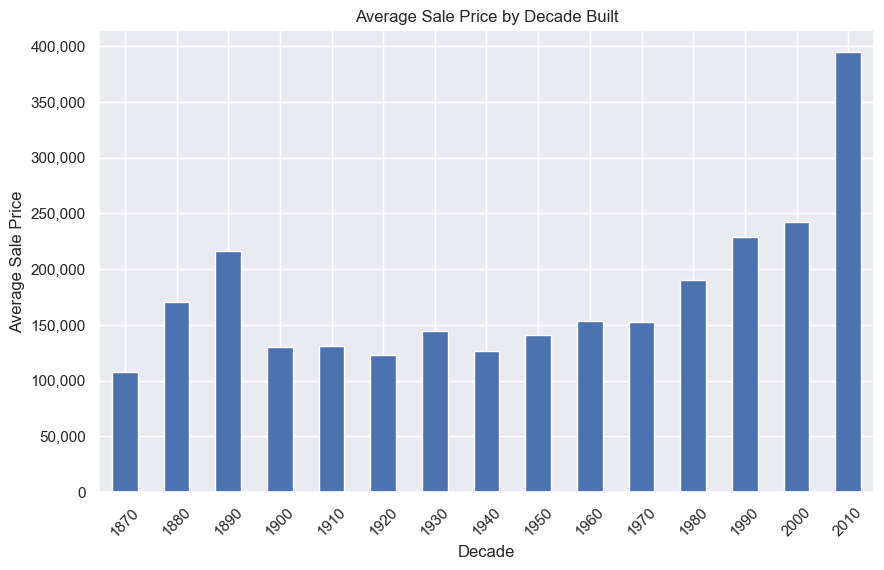

Decade
1870    108000.000000
1880    170425.571429
1890    216316.666667
1900    129828.400000
1910    131511.482759
1920    123268.350515
1930    144415.833333
1940    126887.481013
1950    140935.670659
1960    153852.640000
1970    152828.335106
1980    190080.327869
1990    228404.220859
2000    242046.416021
2010    394432.000000
Name: SalePrice, dtype: float64

In [55]:
df['Decade'] = (df['YearBuilt'] // 10) * 10
avg_price_by_decade = df.groupby('Decade')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
ax = avg_price_by_decade.plot(kind='bar')
plt.title("Average Sale Price by Decade Built")
plt.xlabel("Decade")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
avg_price_by_decade

In [57]:
neighborhood_revenue = df.groupby('Neighborhood')['SalePrice'].sum().sort_values(ascending=False)

print(neighborhood_revenue.head(10))

Neighborhood
NAmes      32815593
CollgCr    29694866
NridgHt    24352838
Somerst    19382666
Gilbert    15235506
OldTown    14489459
NWAmes     13800655
NoRidge    13747108
Edwards    12821970
SawyerW    11006792
Name: SalePrice, dtype: int64


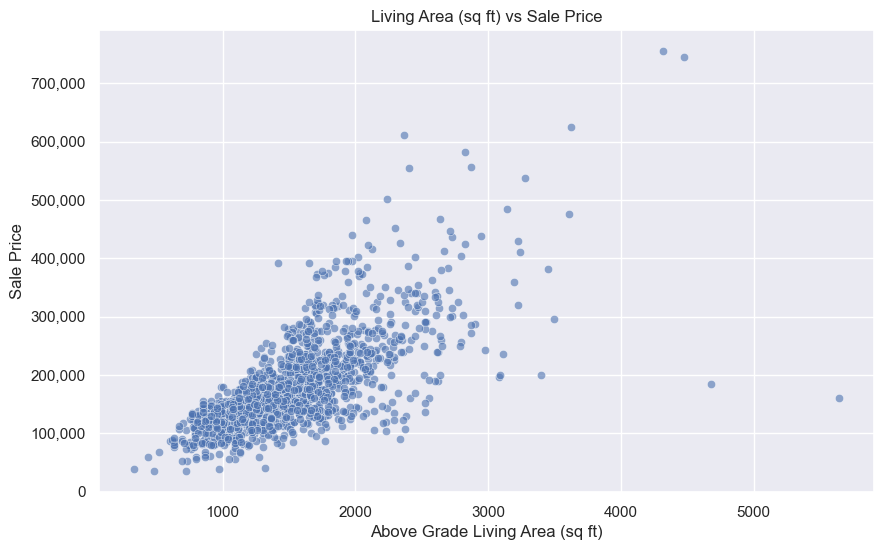

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)
plt.title("Living Area (sq ft) vs Sale Price")
plt.xlabel("Above Grade Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

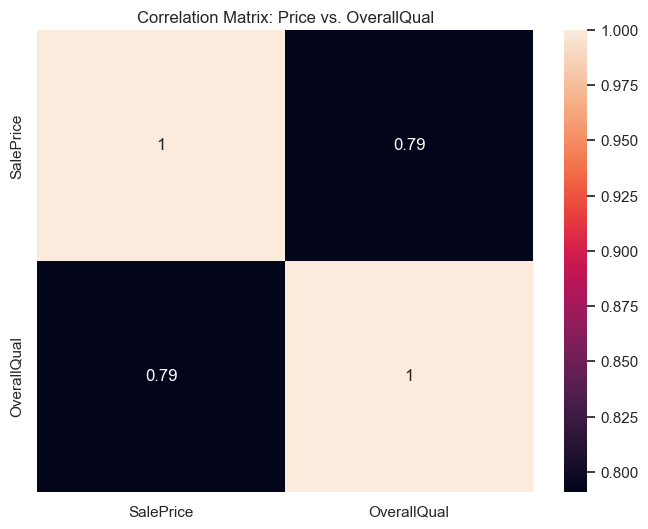

In [66]:
~~~~~~~~plt.figure(figsize=(8, 6))
cols_to_compare = ['SalePrice', 'OverallQual']
sns.heatmap(df[cols_to_compare].corr(), annot=True)
plt.title("Correlation Matrix: Price vs. OverallQual")
plt.show()

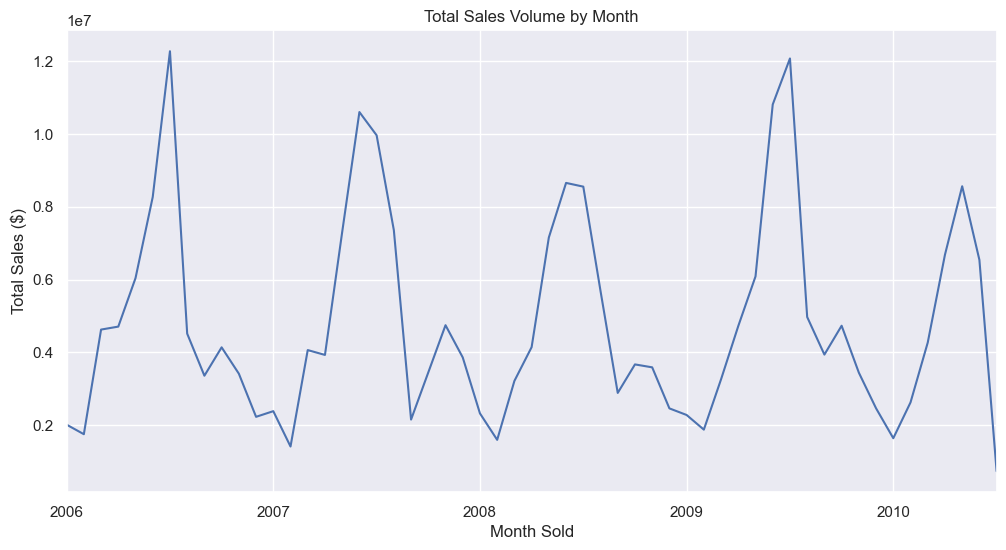

In [65]:
df['Date'] = pd.to_datetime(dict(year=df['YrSold'], month=df['MoSold'], day=1))
df['Month_Period'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month_Period')['SalePrice'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title("Total Sales Volume by Month")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month Sold")
plt.show()